In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

## Problem 1


In [2]:
def p1_checker(fname, m, n):
    # Read image
    src = cv2.imread(fname)
    im = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

    # Crop Center mxm
    y, x = im.shape[:2]                 # Get the dimensions of the image
    im = im[0:y,(x-y)//2:(x-y)//2+y]    # Crop the image to a square by chopping off the left and right sides by half of the difference between x and y
    im =  cv2.resize(im, dsize=(m,m))   # Resize to specified dimensions

    # Create image variations
    im_counterclock = np.flip(np.transpose(im,(1,0,2)),axis=0)
    im_upsidedown = np.flip(im, axis=0)
    im_clockwise = np.transpose(im_upsidedown,(1,0,2))

    # Concatenate them together to form 2x2 grid
    q1_top = np.concatenate((im,im_clockwise),axis=1)
    q1_bottom = np.concatenate((im_counterclock,im_upsidedown),axis=1)
    q1=np.concatenate((q1_top,q1_bottom),axis=0)

    # Tile the grid over as shown in the example output
    final_im = np.tile(q1,(n,n,1))

    print(f"Final shape is {final_im.shape}")
    plt.axis('off')
    plt.imshow(final_im)
    return 

Final shape is (400, 400, 3)


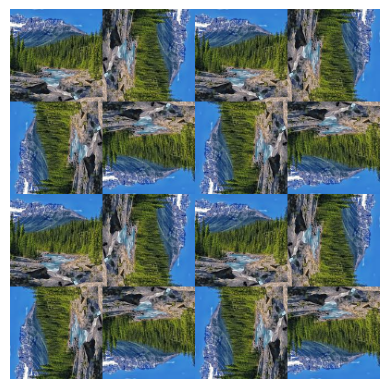

In [3]:
fn = './images/mountain.jpg'
m = 100
n = 2

p1_checker(fn, m, n)

Final shape is (1024, 1024, 3)


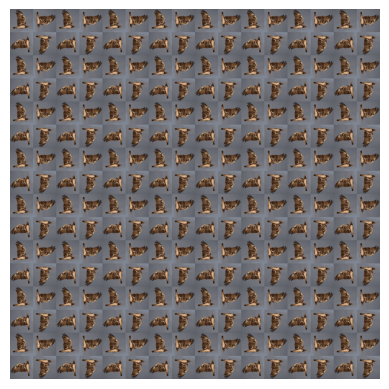

In [4]:
fn = './images/eagle.jpg'
m = 64
n = 8

p1_checker(fn, m, n)

## Problem 2



In [5]:
def p2_vignette(fn, r0, c0):
    # Read image
    src = cv2.imread(fn)
    im = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

    # Calculate Max Dist from r0, c0
    m, n = im.shape[:2]
    max_dist = np.sqrt(max(r0, m-1-r0)**2 + max(c0, n-1-c0)**2)
    
    # # Create dist array
    dist_arr = np.fromfunction(
        lambda i, j: np.sqrt((i - r0) ** 2 + (j - c0) ** 2),
        (m, n),
        dtype=int
    )   
    weight_arr = 1 - np.sqrt(dist_arr / max_dist)

    # add dim to weight array in order to multiply it with im
    weight_arr = weight_arr[:, :, np.newaxis]
    vignette_im = im * weight_arr
    vignette_im = np.clip(vignette_im, 0, 255).astype(np.uint8)

    print(f"d_m = {max_dist:.1f}")
    print(f"W[{m // 4},{n // 4}] = {weight_arr[m // 4, n // 4, 0]:.2f}")
    print(f"W[{m // 4},{3 * n // 4}] = {weight_arr[m // 4, 3 * n // 4, 0]:.2f}")
    print(f"W[{3 * m // 4},{n // 4}] = {weight_arr[3 * m // 4, n // 4, 0]:.2f}")
    print(f"W[{3 * m // 4},{3 * n // 4}] = {weight_arr[3 * m // 4, 3 * n // 4, 0]:.2f}")

    print(f"I[{m // 4},{n // 4}] = {vignette_im[m // 4, n // 4]}")
    print(f"I[{m // 4},{3 * n // 4}] = {vignette_im[m // 4, 3 * n // 4]}")
    print(f"I[{3 * m // 4},{n // 4}] = {vignette_im[3 * m // 4, n // 4]}")
    print(f"I[{3 * m // 4},{3 * n // 4}] = {vignette_im[3 * m // 4, 3 * n // 4]}")

    plt.axis('off')
    plt.imshow(vignette_im)


    return

d_m = 223.6
W[42,75] = 0.21
W[42,225] = 0.47
W[126,75] = 0.24
W[126,225] = 0.60
I[42,75] = [12 17 34]
I[42,225] = [32 56 79]
I[126,75] = [27 26 21]
I[126,225] = [74 81 41]


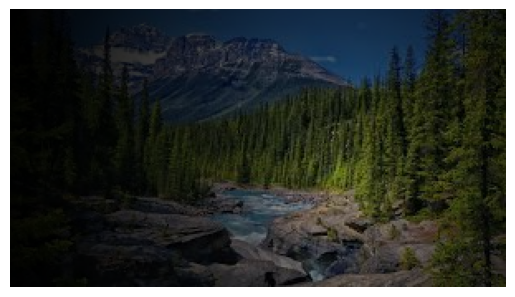

In [6]:
fn = "./images/mountain.jpg"
r0 = 100
c0 = 200

p2_vignette(fn, r0, c0)

d_m = 335.0
W[85,128] = 0.38
W[85,384] = 0.35
W[255,128] = 0.28
W[255,384] = 0.26
I[85,128] = [86 87 88]
I[85,384] = [82 82 83]
I[255,128] = [41 39 36]
I[255,384] = [3 3 6]


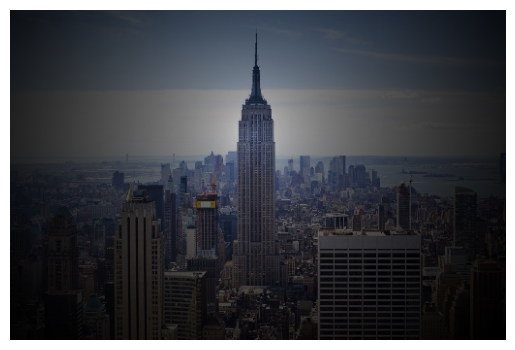

In [7]:
fn = "./images/skyline.jpg"
r0 = 130
c0 = 250

p2_vignette(fn, r0, c0)

## Problem 3


In [8]:
def p3_block(fn, m, n, b):
    im = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

    M, N = im.shape

    s_m = M / m
    s_n = N / n

    downsized_im = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            # Calculate the corresponding region in the original image
            start_i = math.ceil(i * s_m)
            end_i = math.ceil((i + 1) * s_m)
            start_j = math.ceil(j * s_n)
            end_j = math.ceil((j + 1) * s_n)

            # Average the region and assign to the new image
            downsized_im[i, j] = np.average(im[start_i:end_i, start_j:end_j])

    downsized_median = np.median(downsized_im)
    binary_im = np.where(downsized_im >= downsized_median, 255, 0)

    binary_im_upscaled = binary_im.repeat(15, axis=0).repeat(15, axis=1)
    print( )
    downsized_im_upscaled = downsized_im.repeat(15, axis=0).repeat(15, axis=1)

    print(f"Downsized images are {binary_im.shape}")
    print(f"Block images are {binary_im_upscaled.shape}")
    print(f"Average intensity at {m // 4, n // 4} is {downsized_im[m // 4, n // 4]:.1f}")
    print(f"Average intensity at {m // 4, 3*n // 4} is {downsized_im[m // 4, 3*n // 4]:.1f}")
    print(f"Average intensity at {3*m // 4, n // 4} is {downsized_im[3*m // 4, n // 4]:.1f}")
    print(f"Average intensity at {3*m // 4, 3*n // 4} is {downsized_im[3*m // 4, 3*n // 4]:.1f}")
    print(f"Binary threshold: {downsized_median:.1f}")

    plt.axis('off')
    plt.imshow(downsized_im_upscaled, cmap="gray")
    plt.show()
    plt.imshow(binary_im_upscaled, cmap="gray")
    plt.axis('off')
    pass


Downsized images are (25, 18)
Block images are (375, 270)
Average intensity at (6, 4) is 59.4
Average intensity at (6, 13) is 55.1
Average intensity at (18, 4) is 158.3
Average intensity at (18, 13) is 35.3
Binary threshold: 134.7


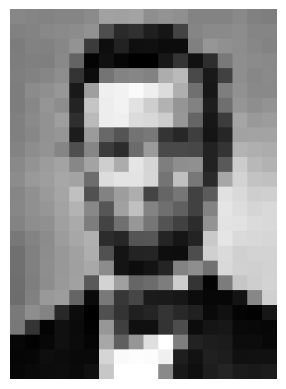

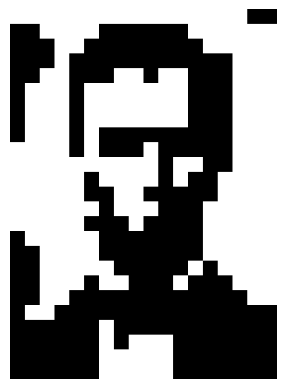

In [9]:
fname = "./images/lincoln1.jpg"
m = 25
n = 18
b = 15

p3_block(fname, m, n, b)


Downsized images are (30, 16)
Block images are (450, 240)
Average intensity at (7, 4) is 22.0
Average intensity at (7, 12) is 27.1
Average intensity at (22, 4) is 15.1
Average intensity at (22, 12) is 27.3
Binary threshold: 27.7


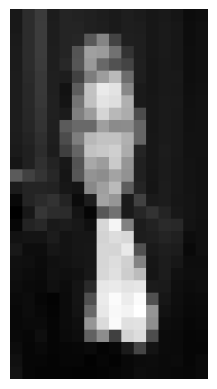

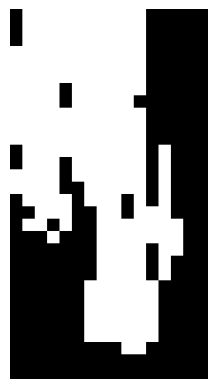

In [10]:
fname = "./images/ginsburg.jpg"
m = 30
n = 16
b = 14

p3_block(fname, m, n, b)